In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sns

In [19]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
data.shape

(150, 6)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [22]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

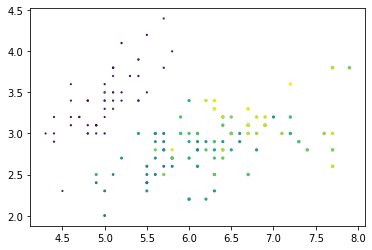

In [24]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'],marker='o')

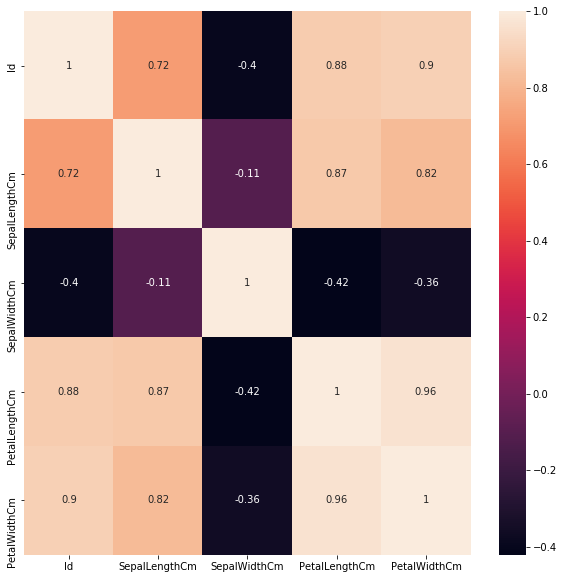

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

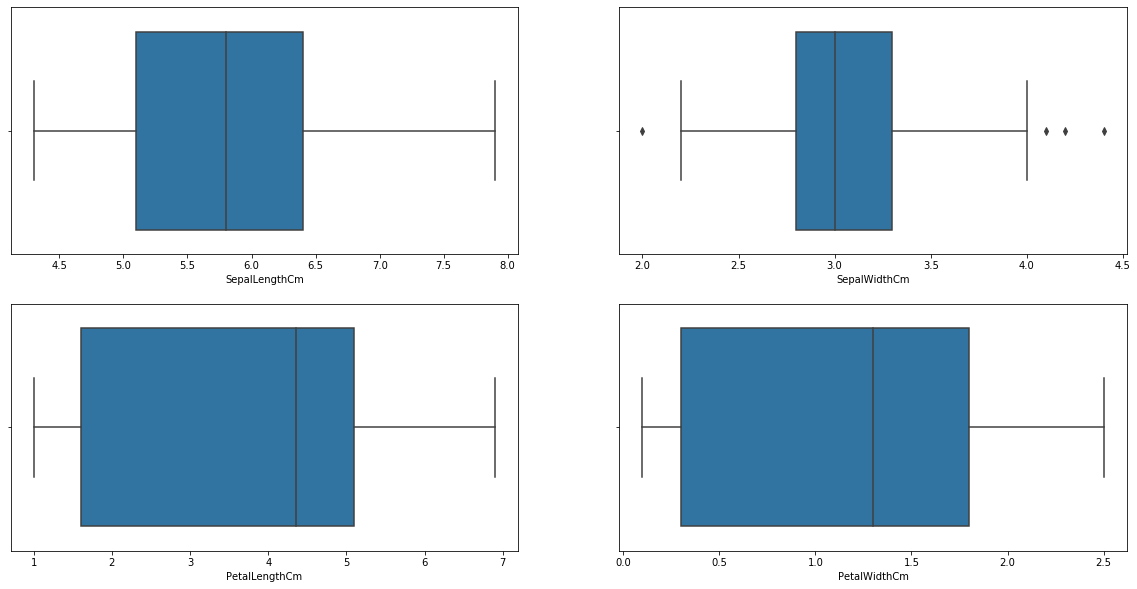

In [26]:
fig,axs = plt.subplots(2,2,figsize=(20,10))
plt1 = sns.boxplot(data['SepalLengthCm'],ax = axs[0,0])
plt2 = sns.boxplot(data['SepalWidthCm'],ax = axs[0,1])
plt3 = sns.boxplot(data['PetalLengthCm'],ax = axs[1,0])
plt4 = sns.boxplot(data['PetalWidthCm'],ax = axs[1,1])

In [49]:
x = data.iloc[:,0:5]
y = data.iloc[:,-1]


In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=10)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [30]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
max_depth = [1,3,5,7,9]

In [32]:
from sklearn.model_selection import GridSearchCV
optimum = GridSearchCV(estimator=model,param_grid=dict(criterion=criterion,max_features=max_features,max_depth=max_depth))

In [33]:
optimum.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [34]:
optimum.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

In [39]:
iris = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto')

In [44]:
iris.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
ypred = iris.predict(xtest)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

1.0